## Laptop Price Analysis

Import Required Libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")


Load the Dataset

In [10]:
df = pd.read_csv("laptop_prices.csv")
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


 Explore the Dataset

In [11]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())

(1275, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq  

Data Preprocessing

In [12]:
df['Ram'] = df['Ram'].astype(str).str.replace("GB", "").astype(int)
df['Weight'] = df['Weight'].astype(str).str.replace("kg", "").astype(float)
df = df.drop_duplicates()
df.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

Converting Categorical Data using One-Hot Encoding

In [13]:
categorical_cols = [
    'Company', 'Product', 'TypeName', 'OS',
    'Screen', 'Touchscreen', 'IPSpanel', 'RetinaDisplay',
    'CPU_company', 'CPU_model', 'PrimaryStorageType',
    'SecondaryStorageType', 'GPU_company', 'GPU_model'
]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

Defining Features and Target

In [14]:
X = df_encoded.drop('Price_euros', axis=1)
y = df_encoded['Price_euros']

Training Linear Regression Model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Evaluate the Model

In [16]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 3935205.02
R-squared Score: -6.93


Visualize Actual vs Predicted Prices

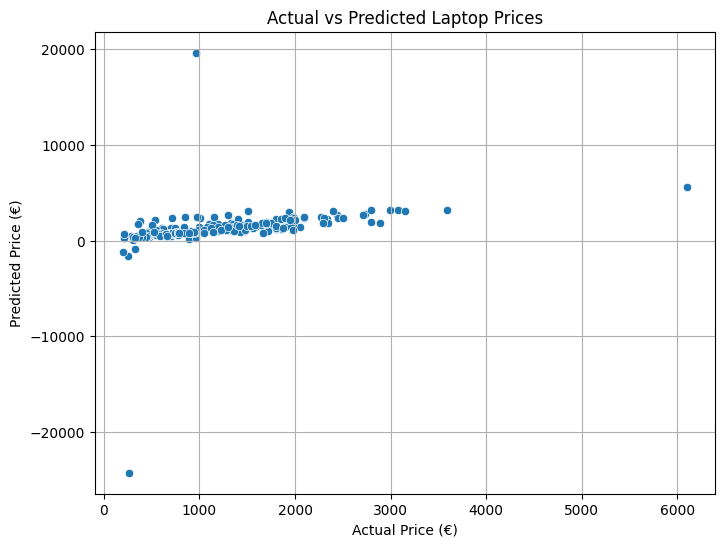

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price (€)")
plt.ylabel("Predicted Price (€)")
plt.title("Actual vs Predicted Laptop Prices")
plt.grid(True)
plt.show()

Top Brands by Average Price

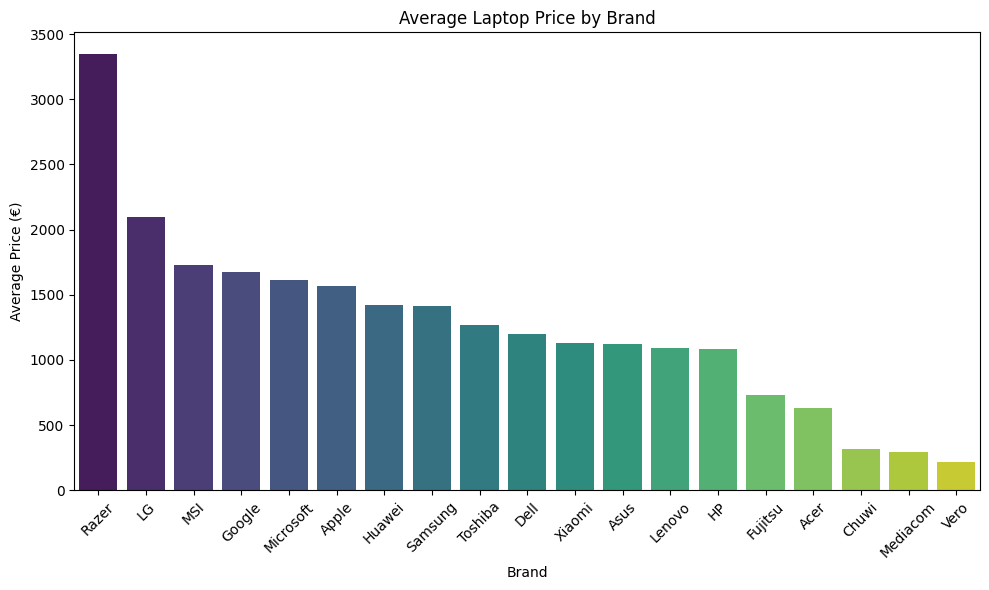

In [19]:
plt.figure(figsize=(10,6))
top_brands = df.groupby('Company')['Price_euros'].mean().sort_values(ascending=False)
sns.barplot(x=top_brands.index, y=top_brands.values, palette="viridis")
plt.xticks(rotation=45)
plt.title('Average Laptop Price by Brand')
plt.ylabel('Average Price (€)')
plt.xlabel('Brand')
plt.tight_layout()
plt.show()

Distribution of Prices

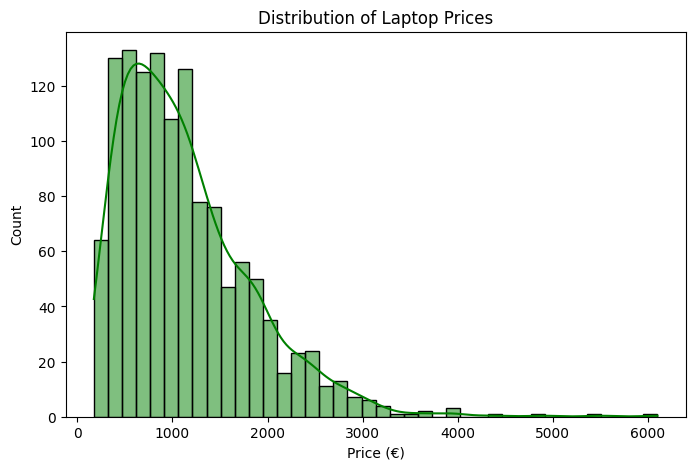

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price_euros'], kde=True, bins=40, color='green')
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.show()


Heatmap of Feature Correlation

plt.figure(figsize=(14,10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', center=0, square=True, linewidths=.5)
plt.title("Feature Correlation Heatmap")
plt.show()
